# GARCH Model

In general, ARMA (ARIMA) model is fit for prediction, however, the volatility may change over time, the ARMA model will be inaccurate. The GARCH model help us forecast with unstable volatility, we usually apply in financial market. In this example, we downloaded the HSBC (0005.HK) stock price from Yahoo Finance API, showed the problem of volatility and applied the GARCH model.

In [1]:
# Install and load the 'tseries' library
#install.packages("tseries")
library("tseries")

Warning message:
"package 'tseries' was built under R version 3.3.2"

In [2]:
# It is a useful function let us download data from yahoo finance api
# I downloaded HSBC(0005.hk) for this example
x=get.hist.quote(instrument="0005.hk",start="2013-01-01", end="2016-12-31",quote=c("Open","Close","AdjClose","Volume"))
data = x[,'AdjClose']
data.ts = ts(data)
# Log Differencing
dld = diff(log(data.ts))
# Eliminate the mean 
dlmd = dld - mean(dld)

time series ends   2016-12-16


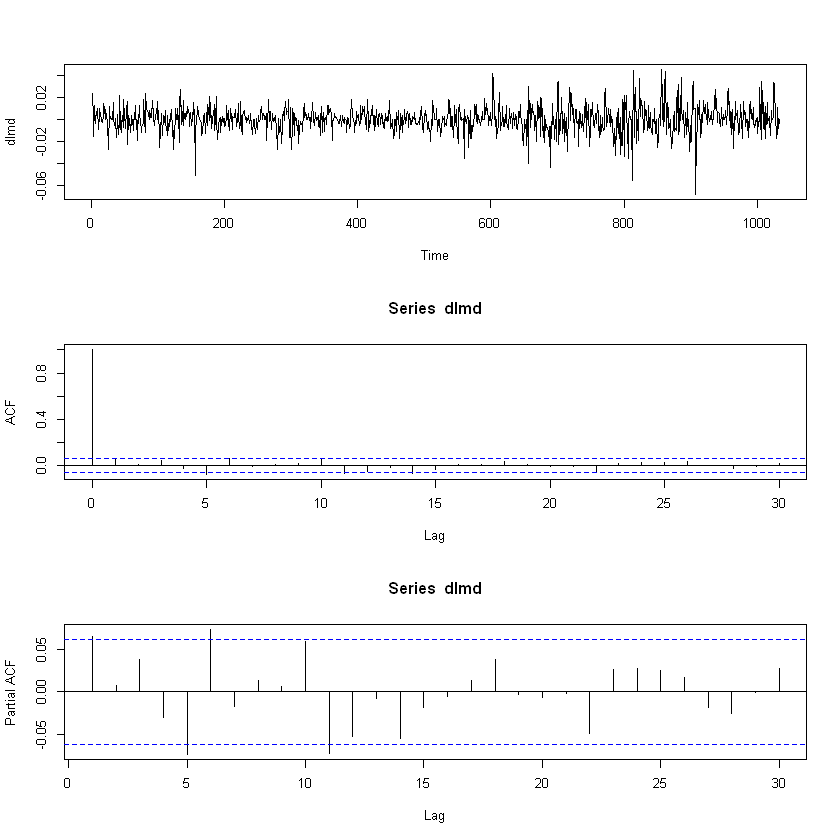

In [3]:
par(mfrow=c(3,1))
plot.ts(dlmd) # Plot the graph of time series
acf(dlmd) # Plot the ACF
acf(dlmd,type="partial") # Plot the PACF
# TS Graph and PACF show that the volatility is not fixed
# ARIMA would not be applied

# Volatility

According to the graphs above, we found that the volatility is high in right side, the ARIMA couldn't be applied in this case. Robert F. Engle created a solution for conditional volatility, ARCH model.

In [4]:
fit=garch(dlmd,order=c(1,1),mean)
summary(fit)


 ***** ESTIMATION WITH ANALYTICAL GRADIENT ***** 


     I     INITIAL X(I)        D(I)

     1     1.202260e-04     1.000e+00
     2     5.000000e-02     1.000e+00
     3     5.000000e-02     1.000e+00

    IT   NF      F         RELDF    PRELDF    RELDX   STPPAR   D*STEP   NPRELDF
     0    1 -4.095e+03
     1    8 -4.095e+03  5.17e-05  9.67e-05  3.4e-05  3.4e+10  3.4e-06  1.64e+06
     2    9 -4.095e+03  2.34e-07  2.51e-07  3.4e-05  2.0e+00  3.4e-06  1.54e+00
     3   17 -4.099e+03  9.04e-04  1.53e-03  3.6e-01  2.0e+00  5.6e-02  1.54e+00
     4   20 -4.104e+03  1.28e-03  1.17e-03  6.7e-01  1.8e+00  2.2e-01  5.75e-02
     5   22 -4.122e+03  4.44e-03  2.98e-03  4.4e-01  2.0e+00  4.5e-01  5.45e+00
     6   34 -4.124e+03  4.09e-04  1.53e-03  3.0e-06  2.8e+00  4.4e-06  6.50e-03
     7   35 -4.125e+03  1.80e-04  1.45e-04  2.9e-06  2.0e+00  4.4e-06  1.31e-02
     8   36 -4.125e+03  7.96e-06  9.53e-06  3.0e-06  2.0e+00  4.4e-06  2.39e-02
     9   37 -4.125e+03  2.53e-07  2.16e-07  3.0e-06 


Call:
garch(x = dlmd, order = c(1, 1), series = mean)

Model:
GARCH(1,1)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0340 -0.5383  0.0131  0.5245  4.5195 

Coefficient(s):
    Estimate  Std. Error  t value Pr(>|t|)    
a0 5.756e-07   3.105e-07    1.854   0.0637 .  
a1 2.942e-02   5.959e-03    4.936 7.97e-07 ***
b1 9.671e-01   6.842e-03  141.347  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Diagnostic Tests:
	Jarque Bera Test

data:  Residuals
X-squared = 209.96, df = 2, p-value < 2.2e-16


	Box-Ljung test

data:  Squared.Residuals
X-squared = 3.4573, df = 1, p-value = 0.06297


# Summary

The summary above showed the significant result of GARCH(1,1), because the coefficients and Box-Ljung test were good enough. To confirm the accuracy of model, we also checked the Q-Q plot as below. The Q-Q plot is quite straight, so I accepted GARCH(1,1).

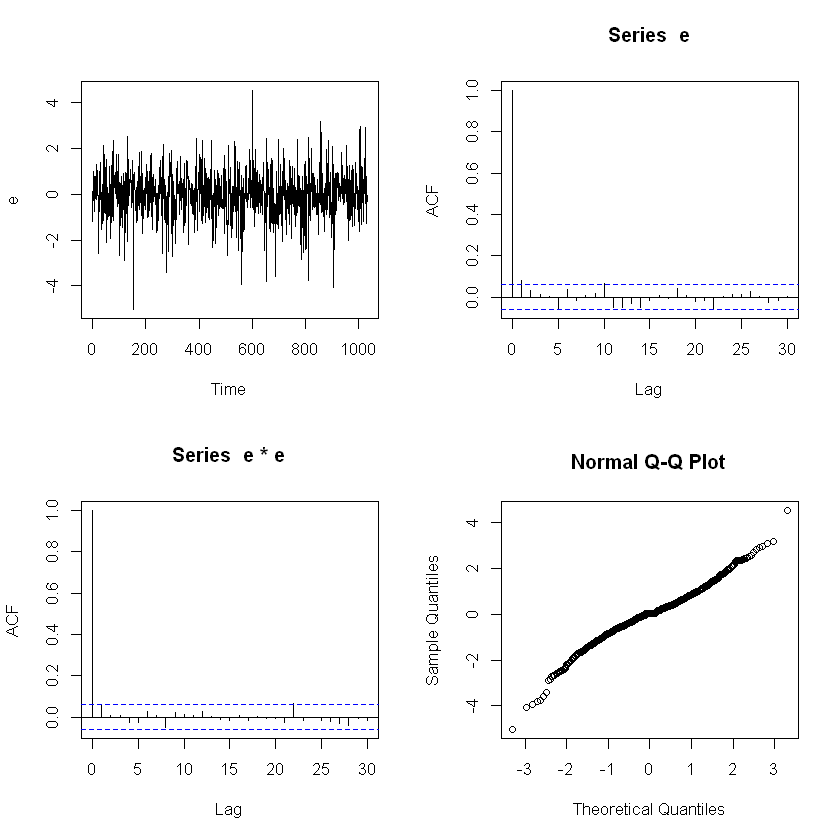

In [5]:
e=fit$residuals
e=e[-1] # (e[1]=NA,e[c(1:2)]=NA)
par(mfrow=c(2,2))
ts.plot(e)
acf(e)
acf(e*e)
qqnorm(e)